**The objective here, is to practice accessing and using NASA's public APIs to retrieve and manipulate space-related data, including obtaining an API key, making API requests, processing data into a pandas DataFrame, and exporting the results to a CSV file for sharing.**

In [1]:
import requests
import pandas as pd
from PIL import Image
from io import BytesIO
import textwrap
import matplotlib.pyplot as plt

In [2]:
# Defining API Key & Endpoints

api_key = "415ReyS1kPtELysTOpDITIngg5ElPaftabYRhG3R"
apod_url = "https://api.nasa.gov/planetary/apod"
neo_url = "https://api.nasa.gov/neo/rest/v1/feed"

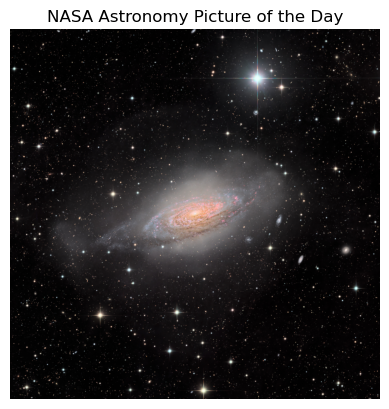

Title: NGC 3521: Galaxy in a Bubble
Date: 2025-06-19
Explanation:

Gorgeous spiral galaxy NGC 3521 is a mere 35 million light-years away, toward the northern
springtime constellation Leo. Relatively bright in planet Earth's sky, NGC 3521 is easily visible in
small telescopes but often overlooked by amateur imagers in favor of other Leo spiral galaxies, like
M66 and M65. It's hard to overlook in this colorful cosmic portrait though. Spanning some 50,000
light-years the galaxy sports characteristic patchy, irregular spiral arms laced with dust, pink
star forming regions, and clusters of young, blue stars. The deep image also finds NGC 3521 embedded
in fainter, gigantic, bubble-like shells. The shells are likely tidal debris, streams of stars torn
from satellite galaxies that have undergone mergers with NGC 3521 in the distant past.


In [3]:
# Astronomy Picture of the Day (APOD)

apod_params = {'api_key': api_key}
apod_response = requests.get(apod_url, params=apod_params)

if apod_response.status_code == 200:
    apod_data = apod_response.json()

    # Display image
    image_url = apod_data.get('url')
    img_response = requests.get(image_url)

    try:
        img = Image.open(BytesIO(img_response.content))
        plt.imshow(img)
        plt.axis('off')
        plt.title("NASA Astronomy Picture of the Day")
        plt.show()
    except Exception as e:
        print("Unable to display image:", e)

    # Displaying information
    print("Title:", apod_data.get('title'))
    print("Date:", apod_data.get('date'))
    print("Explanation:\n")
    print(textwrap.fill(apod_data.get('explanation', ''), width=100))

else:
    print("APOD Request Failed. Status code:", apod_response.status_code)

In [6]:
# Asteroids - NEO Feed API

neo_params = {
    'start_date': '2023-10-01',
    'end_date': '2023-10-02',
    'api_key': api_key
}

neo_response = requests.get(neo_url, params=neo_params)

if neo_response.status_code == 200:
    neo_data = neo_response.json()
    asteroids = []

    # Looping through NEOs per date
    for date, objects in neo_data['near_earth_objects'].items():
        for obj in objects:
            asteroid = {
                'Asteroid ID': obj['id'],
                'Asteroid Name': obj['name'],
                'Minimal Estimated Diameter (km)': obj['estimated_diameter']['kilometers']['estimated_diameter_min'],
                'Absolute Magnitude': obj['absolute_magnitude_h'],
                'Relative Velocity (km/s)': float(obj['close_approach_data'][0]['relative_velocity']['kilometers_per_second'])
            }
            asteroids.append(asteroid)

    # Converting to DataFrame
    asteroid_df = pd.DataFrame(asteroids)
    print("Near-Earth Asteroids Info:")
    print(asteroid_df.head())

else:
    print("NEO Request Failed. Status code:", neo_response.status_code)

Near-Earth Asteroids Info:
  Asteroid ID       Asteroid Name  Minimal Estimated Diameter (km)  \
0     2137084  137084 (1998 XS16)                         1.344482   
1     2252399  252399 (2001 TX44)                         0.348783   
2     3342645          (2006 SG7)                         0.071871   
3     3451020          (2009 EG3)                         0.145397   
4     3606252           (2012 OO)                         0.197950   

   Absolute Magnitude  Relative Velocity (km/s)  
0               16.48                 18.020338  
1               19.41                 13.173765  
2               22.84                 11.207452  
3               21.31                 19.749447  
4               20.64                  9.442147  


In [8]:
# Exporting to CSV
asteroid_df.to_csv("nasa_asteroids.csv", index=False)
print("Data exported to 'nasa_asteroids.csv'")

Data exported to 'nasa_asteroids.csv'
